In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
jan = pd.read_csv("jan_18.csv")
feb = pd.read_csv("feb_18.csv")
mar = pd.read_csv("mar_18.csv")
apr = pd.read_csv("apr_18.csv")
may = pd.read_csv("may_18.csv")
jun = pd.read_csv("jun_18.csv")

dfs = [jan,feb,mar,apr,may,jun]

In [12]:
#appending trip distance and duration from every month to the same dataframe - prsn. minutes column added

prsn = pd.DataFrame() 
for df in dfs:
    #filtering unplausible values regarding average speed of the rides - reducing noise
    df = df[df['miles_hour'] <90]
    longdist = df[["trip_distance", "duration"]]
    longdist['minutes'] = longdist['duration'] / 60
    
    prsn = prsn.append(longdist[["minutes","trip_distance"]])

/Users/mattiasbasso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
#we have values with 0 distance or 0 minutes because under some lights they're meaningful. not for the dependacy
#between time and distance. They don't carry information
prsn = prsn[(prsn['minutes']>1) | (prsn['trip_distance']>0)]

With the help of the scatterplot below we can see that after some meaningful data cleaning/noise removing procedures the relation between duration and distance of rides becomes quite clear 

[(0, 80), (0, 210)]

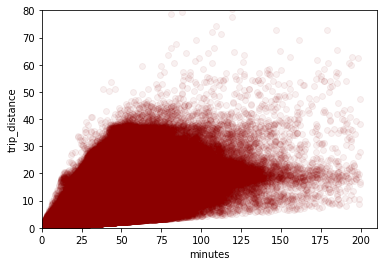

In [16]:
%matplotlib inline

pl = sns.regplot( x=prsn["minutes"], y=prsn["trip_distance"], fit_reg=False, scatter_kws = { 'color': 'darkred', 'alpha':0.06})
pl.set_title("Distance and duration correlation")
pl.set(xlim = (0,210), ylim=(0, 70))


After our analysis we found a *high* **Pearson coefficient**. It makes sense given the fact that, obviously, space and time are linked one another, even in traffic. The slow rides are balanced from the fast ones.

In [17]:
prsn.corr()

,minutes,trip_distance
minutes,1.000000,0.804882
trip_distance,0.804882,1.000000
